In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from bokeh.resources import CDN
from bokeh.embed import file_html

In [2]:
filename='processed\SAP_Test_Data_BKPF Table.txt_processed'
#filename='processed\SAP_Test_Data_GLT0 Table.txt_processed'
#filename='processed\SAP_Test_Data_BSEG Table.txt_processed'

In [3]:
df= pd.read_csv(filename,sep='|',dtype=str,low_memory=False)
df_string= pd.read_csv(filename,sep='|',dtype=str,low_memory=False)
df.head(5)

,Buchungskreis,Belegnummer,Geschäftsjahr,Belegart,Belegdatum,Buchungsdatum,Buchungsperiode,Erfassungsdatum,Erfassungsuhrzeit,Geändert am,...,Übergreifende Nr,Referenz,Jahr,Belegkopftext,Währung,Umrechnungskurs,Konzernwährung,Konzernkurs,Belegstatus,Dokumentenname im Archivsystem
0,1710,100002131,2016,SA,2016-01-01 00:00:00,2016-01-01 00:00:00,1,2016-12-15 00:00:00,1900-01-01 11:07:34,NaN,...,NaN,NaN,NaN,NaN,USD,NaN,NaN,NaN,NaN,NaN
1,1710,100002132,2016,SA,2016-01-01 00:00:00,2016-01-01 00:00:00,1,2016-12-15 00:00:00,1900-01-01 11:07:34,NaN,...,NaN,NaN,NaN,NaN,USD,NaN,NaN,NaN,NaN,NaN
2,1710,100002133,2016,SA,2016-01-01 00:00:00,2016-01-01 00:00:00,1,2016-12-15 00:00:00,1900-01-01 11:07:34,NaN,...,NaN,NaN,NaN,NaN,USD,NaN,NaN,NaN,NaN,NaN
3,1710,100002134,2016,SA,2016-01-01 00:00:00,2016-01-01 00:00:00,1,2016-12-15 00:00:00,1900-01-01 11:07:34,NaN,...,NaN,NaN,NaN,NaN,USD,NaN,NaN,NaN,NaN,NaN
4,1710,100002135,2016,SA,2016-01-01 00:00:00,2016-01-01 00:00:00,1,2016-12-15 00:00:00,1900-01-01 11:07:35,NaN,...,NaN,NaN,NaN,NaN,USD,NaN,NaN,NaN,NaN,NaN


In [4]:
from math import pi

import pandas as pd

from bokeh.io import output_file, show
from bokeh.palettes import BuGn,PRGn
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.plotting import figure, output_notebook, show


# ax1.pie(types_df['types'], explode=explode, labels=types_df['index'], autopct='%1.1f%%', pctdistance=0.7,labeldistance=1.05,radius=2000, 
#     shadow=True, startangle=90)
data=pd.DataFrame({
    'NULL': [df.isna().sum().sum()]
    ,'Not_NULL': [df.count().sum()]
})
#z=data.set_index('type').to_dict()['number']
if data.iloc[0,:][0]==0:
    data.loc['null']=1
data=data.transpose()
data



,0
NULL,27500
Not_NULL,30000


In [5]:
df.columns.to_list()

['Buchungskreis',
 'Belegnummer',
 'Geschäftsjahr',
 'Belegart',
 'Belegdatum',
 'Buchungsdatum',
 'Buchungsperiode',
 'Erfassungsdatum',
 'Erfassungsuhrzeit',
 'Geändert am',
 'Letzte Fortschreib',
 'Umrechnungsdatum',
 'Transaktionscode',
 'Übergreifende Nr',
 'Referenz',
 'Jahr',
 'Belegkopftext',
 'Währung',
 'Umrechnungskurs',
 'Konzernwährung',
 'Konzernkurs',
 'Belegstatus',
 'Dokumentenname im Archivsystem']

In [6]:
d={'Column anzahl':[len(df.columns.to_list())]}
overview=pd.DataFrame(data=d)
overview[data.index.astype(str)]= data[0]
overview['Anzahl der Rows']=len(df.index)


In [7]:
overview

,Column anzahl,NULL,Not_NULL,Anzahl der Rows
0,23,27500,30000,2500


In [8]:
studentDict = dict(zip(data.index.astype(str), data[0]))
studentDict

{'NULL': 27500, 'Not_NULL': 30000}

In [9]:

data_fix = pd.Series(studentDict).reset_index(name='value').rename(columns={'index': 'country'})
data_fix['angle'] = data_fix['value']/data_fix['value'].sum() * 2*pi
data_fix['color'] = ['#35B778','#a1dab4']


In [10]:
data_fix['perc']=round(data_fix['value']/data_fix['value'].sum()*100,3)
data_fix

,country,value,angle,color,perc
0,NULL,27500,3.005002,#35B778,47.826
1,Not_NULL,30000,3.278184,#a1dab4,52.174


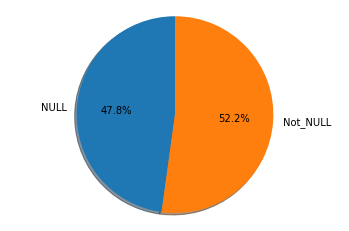

In [11]:
fig1, ax1 = plt.subplots()
ax1.pie(data_fix['value'], labels=data_fix['country'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [12]:
#from bokeh.io.saving import save
#from bokeh.io.showing import show


from matplotlib.pyplot import title


p = figure(height=350, title="Total Null vs NotNull Values over complete File", toolbar_location=None, 
           tools="hover", tooltips=
           [('name', "@country"),("Value", "@value"), ("Percent", "@perc")]
           , x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='country', source=data_fix)

p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None
output_notebook()
#save(p)
show(p)


Loading BokehJS ...

In [13]:
#https://www.youtube.com/watch?v=0jZrnBS6laY

In [14]:
data_fix

,country,value,angle,color,perc
0,NULL,27500,3.005002,#35B778,47.826
1,Not_NULL,30000,3.278184,#a1dab4,52.174


In [15]:
data_fix['perc']=round(data_fix['value']/data_fix['value'].sum()*100,3)

p = figure(height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips=[('name', "@country"),("Value", "@value"), ("Percent", "@perc")], x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='country', source=data_fix)

p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None
#output_notebook()
show(p)

In [16]:
df.count().sum()

30000

In [17]:
def convert_int(convert,df):
    pbjekts=pd.DataFrame(df.dtypes,columns=['types'])
    for x in pbjekts[pbjekts['types']=='object'].index.to_list()=
        try=
            df[x]=df[x].astype(convert)
        except=
            pass

In [18]:
def date_check(df,var):
    col=[s for s in df.columns.to_list() if any([x.lower for x in var if x.lower() in s.lower()])]
    for x in col:
        if df[x].str.len().mean()==4:
            #print('ja')
            col.remove(x)
    return col

In [19]:
var=['jahr','datum','Dat']
col=date_check(df,var)
df[col]=df.loc[:,col].apply(pd.to_datetime)
var2=['zeit','uhr']
col2=date_check(df,var2)
df[col2]=df.loc[:,col2].apply(pd.to_datetime)
for x in col2=
    df[x]=df[x].dt.time

In [20]:
pbjekts=pd.DataFrame(df.dtypes,columns=['types'])
list=pbjekts[pbjekts['types']=='object'].index.to_list()
zeiten=['jahr','datum','Dat','zeit','uhr']
new_list= [s for s in list if not any([x.lower for x in zeiten if x in s.lower()])]
new_list = [s for s in list if not df[s].isnull().values.all()]
new_list= [s for s in list if not (df[s] == '0.0').all()] 
new_list= [s for s in list if not (df[s] == 0.0).all()] 
new_list= [s for s in list if not (df[s] == 0).all()] 
new_list= [s for s in list if not (df[s] == 'nan').all()] 
new_list

['Buchungskreis',
 'Belegnummer',
 'Geschäftsjahr',
 'Belegart',
 'Buchungsperiode',
 'Erfassungsuhrzeit',
 'Geändert am',
 'Letzte Fortschreib',
 'Transaktionscode',
 'Übergreifende Nr',
 'Referenz',
 'Belegkopftext',
 'Währung',
 'Umrechnungskurs',
 'Konzernwährung',
 'Konzernkurs',
 'Belegstatus',
 'Dokumentenname im Archivsystem']

In [21]:
for column in new_list:
    try:
        if any(round(df[column].astype(float)) != df[column].astype(float)):
            print('float: ',column)
            df[column]=df[column].astype(float)
        elif all(round(df[column].astype(float)) == df[column].astype(float)):
            print('int: ',column)
            df[column]=df[column].astype(int).round()
    except:
        print('STR: ',column)

        #pass

int:  Buchungskreis
int:  Belegnummer
int:  Geschäftsjahr
STR:  Belegart
int:  Buchungsperiode
STR:  Erfassungsuhrzeit
float:  Geändert am
float:  Letzte Fortschreib
STR:  Transaktionscode
float:  Übergreifende Nr
float:  Referenz
float:  Belegkopftext
STR:  Währung
float:  Umrechnungskurs
float:  Konzernwährung
float:  Konzernkurs
float:  Belegstatus
float:  Dokumentenname im Archivsystem


In [22]:
df_string.describe()

,Buchungskreis,Belegnummer,Geschäftsjahr,Belegart,Belegdatum,Buchungsdatum,Buchungsperiode,Erfassungsdatum,Erfassungsuhrzeit,Geändert am,...,Übergreifende Nr,Referenz,Jahr,Belegkopftext,Währung,Umrechnungskurs,Konzernwährung,Konzernkurs,Belegstatus,Dokumentenname im Archivsystem
count,2500,2500,2500,2500,2500,2500,2500,2500,2500,0,...,0,0,0,0,2500,0,0,0,0,0
unique,1,2500,1,2,20,20,1,1,596,0,...,0,0,0,0,1,0,0,0,0,0
top,1710,100002131,2016,SA,2016-01-01 00:00:00,2016-01-01 00:00:00,1,2016-12-15 00:00:00,1900-01-01 11:53:01,NaN,...,NaN,NaN,NaN,NaN,USD,NaN,NaN,NaN,NaN,NaN
freq,2500,1,2500,1383,144,144,2500,2500,10,NaN,...,NaN,NaN,NaN,NaN,2500,NaN,NaN,NaN,NaN,NaN


In [23]:
pbjekts=pd.DataFrame(df.dtypes,columns=['types'])
pbjekts['unique']=df.nunique()
pbjekts['null']=df.isna().sum()
pbjekts['not_null']=df.count()
pbjekts
pr=pbjekts[pbjekts['unique']<200]
pg=pbjekts[pbjekts['unique']>=200]

In [24]:
pg.empty

False

In [25]:
from bokeh.plotting import figure, output_notebook, show,output_notebook
from bokeh.models import ColumnDataSource,HoverTool
from bokeh.transform import dodge

langs = pg.index.to_list()
data = {'langs' : langs,
        'unique'   : [ int(x) for x in pg['unique'].to_list() ]
        }
source = ColumnDataSource(data=data)

    
students = [ int(x) for x in pg['unique'].to_list() ]
fig = figure(x_range = langs, plot_width = 500, plot_height =400,toolbar_location=None, tools="", title="Unique values with qual or more than 200  unique values")
fig.xaxis.major_label_orientation = "vertical"
fig.vbar(x = dodge('langs',  0, range=fig.x_range), top='unique', width = 0.5,name='unique',source=source)

# fig.vbar(x=dodge('NullNotNull',  0.15, range=fig.x_range), top='notnull', width=0.2, source=source,
#        color="#e84d60", legend_label="notnull",name='notnull')
hover = HoverTool()
hover.tooltips = """
<div>
    <div><strong>Column:  </strong>@langs</div>
    <div><strong>Count: </strong>@$name</div>
</div>"""
fig.add_tools(hover)


In [26]:
#output_notebook()
show(fig)

In [27]:
pr

,types,unique,null,not_null
Buchungskreis,int32,1,0,2500
Geschäftsjahr,int32,1,0,2500
Belegart,object,2,0,2500
Belegdatum,datetime64[ns],20,0,2500
Buchungsdatum,datetime64[ns],20,0,2500
Buchungsperiode,int32,1,0,2500
Erfassungsdatum,datetime64[ns],1,0,2500
Geändert am,float64,0,2500,0
Letzte Fortschreib,float64,0,2500,0
Umrechnungsdatum,datetime64[ns],20,0,2500


In [28]:
from bokeh.plotting import figure, output_notebook, show,output_notebook
from bokeh.models import ColumnDataSource,HoverTool
from bokeh.transform import dodge

langs = pr.index.to_list()
data = {'langs' : langs,
        'unique'   : [ int(x) for x in pr['unique'].to_list() ]
        }
source = ColumnDataSource(data=data)

    
students = [ int(x) for x in pr['unique'].to_list() ]
fig = figure(x_range = langs, plot_width = 500, plot_height =400,toolbar_location=None, tools="", title="Unique values with under 200 unique values")
fig.xaxis.major_label_orientation = "vertical"
fig.vbar(x = dodge('langs',  0, range=fig.x_range), top='unique', width = 0.5,name='unique',source=source)

# fig.vbar(x=dodge('NullNotNull',  0.15, range=fig.x_range), top='notnull', width=0.2, source=source,
#        color="#e84d60", legend_label="notnull",name='notnull')
hover = HoverTool()
hover.tooltips = """
<div>
    <div><strong>Column:  </strong>@langs</div>
    <div><strong>Count: </strong>@$name</div>
</div>"""
fig.add_tools(hover)
output_notebook()
show(fig)

Loading BokehJS ...

In [75]:
from bokeh.plotting import figure, output_notebook, show,output_notebook
from bokeh.models import ColumnDataSource,HoverTool
from bokeh.transform import dodge

NullNotNull = pbjekts.index.to_list()
years = ['null', 'notnull']

data = {'NullNotNull' : NullNotNull,
        'null'   : [ int(x) for x in pbjekts['null'].to_list() ],
        'notnull'   : [ int(x) for x in pbjekts['not_null'].to_list() ]}

source = ColumnDataSource(data=data)


In [85]:
#fig = figure(x_range = NullNotNull, plot_width = 300, plot_height = 300)
fig = figure(x_range=NullNotNull,  plot_height = 300, title="Null vs NotNull",
           toolbar_location=None, tools="")

fig.xaxis.major_label_orientation = "vertical"


fig.vbar(x=dodge('NullNotNull',  -0.15,  range=fig.x_range), top='null', width=0.2, source=source,
       color="#595959", legend_label="null",name='null')

fig.vbar(x=dodge('NullNotNull',  0.15, range=fig.x_range), top='notnull', width=0.2, source=source,
       color="#85BC22", legend_label="notnull",name='notnull')
hover = HoverTool()
hover.tooltips = """
<div>
    <div><strong>Column:  </strong>@NullNotNull</div>
    <div><strong>Count: </strong>@$name</div>
</div>"""
fig.add_tools(hover)
output_notebook()
show(fig)

Loading BokehJS ...

In [68]:
pd.DataFrame(pbjekts.loc['Jahr']['null':'not_null'])

,Jahr
null,2500
not_null,0


In [73]:
from math import pi

import pandas as pd

from bokeh.io import output_file, show
from bokeh.palettes import BuGn,PRGn
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.plotting import figure, output_notebook, show


# ax1.pie(types_df['types'], explode=explode, labels=types_df['index'], autopct='%1.1f%%', pctdistance=0.7,labeldistance=1.05,radius=2000, 
#     shadow=True, startangle=90)
data=pd.DataFrame(pbjekts.loc['Jahr']['null':'not_null'])
#z=data.set_index('type').to_dict()['number']
if data.iloc[0,:][0]==0:
    data.loc['null']=1
elif data.iloc[1,:][0]==0:
    data.loc['not_null']=1
data

,Jahr
null,2500
not_null,1


In [33]:
studentDict = dict(zip(data.index.astype(str), data.Buchungskreis))
studentDict

{'null': 1, 'not_null': 2500}

In [34]:
data_fix = pd.Series(studentDict).reset_index(name='value').rename(columns={'index': 'country'})
data_fix['angle'] = data_fix['value']/data_fix['value'].sum() * 2*pi
data_fix


,country,value,angle
0,null,1,0.002512
1,not_null,2500,6.280673


In [35]:
data_fix['color'] = ['#35B778','#a1dab4']
if data_fix['value'][0]==1:
    data_fix['perc']=[0,100]
elif data_fix['value'][1]==1:
    data_fix['perc']=[100,0]
else:
    data_fix['perc']=round(data_fix['value']/data_fix['value'].sum()*100,3)

data_fix

,country,value,angle,color,perc
0,null,1,0.002512,#35B778,0
1,not_null,2500,6.280673,#a1dab4,100


In [36]:

p = figure(height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips=[('name', "@country"),("Value", "@value"), ("Percent", "@perc")], x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='country', source=data_fix)

p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None
output_notebook()
show(p)

Loading BokehJS ...

In [37]:


df_2=pd.merge(pbjekts, df.describe().transpose(), left_index=True, right_index=True)
round(df_2['25%'],1)

Buchungskreis                          1710.0
Belegnummer                       100006267.8
Geschäftsjahr                          2016.0
Buchungsperiode                           1.0
Geändert am                               NaN
Letzte Fortschreib                        NaN
Übergreifende Nr                          NaN
Referenz                                  NaN
Belegkopftext                             NaN
Umrechnungskurs                           NaN
Konzernwährung                            NaN
Konzernkurs                               NaN
Belegstatus                               NaN
Dokumentenname im Archivsystem            NaN
Name: 25%, dtype: float64

In [38]:
df_string.describe()

,Buchungskreis,Belegnummer,Geschäftsjahr,Belegart,Belegdatum,Buchungsdatum,Buchungsperiode,Erfassungsdatum,Erfassungsuhrzeit,Geändert am,...,Übergreifende Nr,Referenz,Jahr,Belegkopftext,Währung,Umrechnungskurs,Konzernwährung,Konzernkurs,Belegstatus,Dokumentenname im Archivsystem
count,2500,2500,2500,2500,2500,2500,2500,2500,2500,0,...,0,0,0,0,2500,0,0,0,0,0
unique,1,2500,1,2,20,20,1,1,596,0,...,0,0,0,0,1,0,0,0,0,0
top,1710,100002131,2016,SA,2016-01-01 00:00:00,2016-01-01 00:00:00,1,2016-12-15 00:00:00,1900-01-01 11:53:01,NaN,...,NaN,NaN,NaN,NaN,USD,NaN,NaN,NaN,NaN,NaN
freq,2500,1,2500,1383,144,144,2500,2500,10,NaN,...,NaN,NaN,NaN,NaN,2500,NaN,NaN,NaN,NaN,NaN


In [39]:
column_data=df_string.describe()['count':'unique'].transpose()
column_data=column_data[column_data['count']!=0]
column_data_für_kar=column_data[column_data['unique']<=10]
kar_list=column_data_für_kar.index.to_list()

In [40]:
from turtle import backward


def anteil_null_values(df,column):
    null=df[column].isna().sum()
    notnull=df[column].count()
    explode=(0, 0.1)
    fig1, ax1 = plt.subplots()
    plt.title(f"Percentage of null values of {column}")
    ax1.pie([null,notnull], explode=explode, labels=['Null Values', 'Not Null Values'], autopct='%1.1f%%',
        shadow=True, startangle=90,)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

In [41]:
values=df.describe()
#values
langs = values.index.to_list()
students = [ int(x) for x in values['Buchungskreis'].to_list() ]


In [42]:
#values=pd.DataFrame(df['Buchungskreis'].describe()).reset_index().rename(columns={'index': 'elements'})
#values
#from bokeh.plotting import figure, output_notebook, show,output_notebook
#
#
#fig = figure(x_range = langs, plot_width = 300, plot_height = 300,tools='')
#fig.xaxis.major_label_orientation = "vertical"
#fig.vbar(x=dodge('Buchungskreis',  0.15, range=fig.x_range), top='Buchungskreis', width=0.2, source=values,
#       color="#e84d60", legend_label="Buchungskreis",name='Buchungskreis')
#fig.vbar(x = langs, top = students, width = 0.5)
#hover = HoverTool()
#
#hover.tooltips = """
#<div>
#    <div><strong>Column:  </strong>@elements</div>
#    <div><strong>Count: </strong>@Buchungskreis</div>
#</div>"""
#fig.add_tools(hover)
#output_notebook()
#show(fig)

In [43]:
values

,Buchungskreis,Belegnummer,Geschäftsjahr,Buchungsperiode,Geändert am,Letzte Fortschreib,Übergreifende Nr,Referenz,Belegkopftext,Umrechnungskurs,Konzernwährung,Konzernkurs,Belegstatus,Dokumentenname im Archivsystem
count,2500.0,2.500000e+03,2500.0,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1710.0,8.595655e+08,2016.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,8.453429e+08,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1710.0,1.000021e+08,2016.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1710.0,1.000063e+08,2016.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1710.0,1.000105e+08,2016.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1710.0,1.800003e+09,2016.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1710.0,1.800009e+09,2016.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
from bokeh.plotting import figure, output_notebook, show,output_notebook

values=df.describe()
values
langs = values.index.to_list()
students = [ int(x) for x in values['Buchungskreis'].to_list() ]
fig = figure(x_range = langs, plot_width = 300, plot_height = 300)
fig.xaxis.major_label_orientation = "vertical"
fig.vbar(x = langs, top = students, width = 0.5)
output_notebook()
show(fig)

Loading BokehJS ...

In [66]:
df_string['Belegnummer'].value_counts()

100002131     1
1800001328    1
1800001321    1
1800001322    1
1800001323    1
             ..
100007432     1
100007433     1
100007434     1
100007435     1
1800009426    1
Name: Belegnummer, Length: 2500, dtype: int64

In [74]:
from bokeh.plotting import figure, output_notebook, show,output_notebook
values=pd.DataFrame(df_string['Jahr'].value_counts()).reset_index(drop=False)
values.rename(columns={'index':'type','types':'number'})

,type,Jahr


In [46]:

langs = values['index'].to_list()
students = [ int(x) for x in values['Buchungskreis'].to_list() ]
fig = figure(x_range = langs, plot_width = 300, plot_height = 300)
fig.xaxis.major_label_orientation = "vertical"
fig.vbar(x = langs, top = students, width = 0.5)
output_notebook()
show(fig)

Loading BokehJS ...

In [47]:
from math import pi

import pandas as pd

from bokeh.io import output_file, show
from bokeh.palettes import BuGn,PRGn
from bokeh.plotting import figure
from bokeh.transform import cumsum
from bokeh.plotting import figure, output_notebook, show


# ax1.pie(types_df['types'], explode=explode, labels=types_df['index'], autopct='%1.1f%%', pctdistance=0.7,labeldistance=1.05,radius=2000, 
#     shadow=True, startangle=90)
types_df=pd.DataFrame(pbjekts['types'].value_counts()).reset_index(drop=False)
types_df


,index,types
0,float64,10
1,datetime64[ns],5
2,int32,4
3,object,4


In [48]:
types_df['types']
data= types_df.copy()
data=data.rename(columns={'index':'type','types':'number'})
#z=data.set_index('type').to_dict()['number']
studentDict = dict(zip(data.type.astype(str), data.number))
data_fix = pd.Series(studentDict).reset_index(name='value').rename(columns={'index': 'country'})


In [49]:
data_fix['angle'] = data_fix['value']/data_fix['value'].sum() * 2*pi
data_fix

,country,value,angle
0,float64,10,2.731820
1,datetime64[ns],5,1.365910
2,int32,4,1.092728
3,object,4,1.092728


In [50]:
data_fix['color'] = BuGn[len(studentDict)]
if data_fix['value'][0]==1:
    data_fix['perc']=[0,100]
elif data_fix['value'][1]==1:
    data_fix['perc']=[100,0]
else:
    data_fix['perc']=round(data_fix['value']/data_fix['value'].sum()*100,3)

data_fix

,country,value,angle,color,perc
0,float64,10,2.731820,#238b45,43.478
1,datetime64[ns],5,1.365910,#66c2a4,21.739
2,int32,4,1.092728,#b2e2e2,17.391
3,object,4,1.092728,#edf8fb,17.391


In [51]:


p = figure(height=350, title="Pie Chart", toolbar_location=None,
           tools="hover", tooltips=[('name', "@country"),("Value", "@value"), ("Percent", "@perc")], x_range=(-0.5, 1.0))

p.wedge(x=0, y=1, radius=0.4,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="white", fill_color='color', legend_field='country', source=data_fix)

p.axis.axis_label = None
p.axis.visible = False
p.grid.grid_line_color = None

show(p)

In [52]:
pd.DataFrame(df['Buchungskreis'].describe()).reset_index(drop=False)

,index,Buchungskreis
0,count,2500.0
1,mean,1710.0
2,std,0.0
3,min,1710.0
4,25%,1710.0
5,50%,1710.0
6,75%,1710.0
7,max,1710.0


In [53]:
#Algemeine Sachen noch rein machen, wie durchscnitt der SPlaten inhlats anzahl
# spalten anzahl
#etc

In [58]:
pbjekts

,types,unique,null,not_null
Buchungskreis,int32,1,0,2500
Belegnummer,int32,2500,0,2500
Geschäftsjahr,int32,1,0,2500
Belegart,object,2,0,2500
Belegdatum,datetime64[ns],20,0,2500
Buchungsdatum,datetime64[ns],20,0,2500
Buchungsperiode,int32,1,0,2500
Erfassungsdatum,datetime64[ns],1,0,2500
Erfassungsuhrzeit,object,596,0,2500
Geändert am,float64,0,2500,0


In [61]:
pd.merge(pbjekts, df.describe().transpose(),how='left', left_index=True, right_index=True)

,types,unique,null,not_null,count,mean,std,min,25%,50%,75%,max
Buchungskreis,int32,1,0,2500,2500.0,1.710000e+03,0.000000e+00,1710.0,1.710000e+03,1710.0,1.710000e+03,1.710000e+03
Belegnummer,int32,2500,0,2500,2500.0,8.595655e+08,8.453429e+08,100002131.0,1.000063e+08,100010523.5,1.800003e+09,1.800009e+09
Geschäftsjahr,int32,1,0,2500,2500.0,2.016000e+03,0.000000e+00,2016.0,2.016000e+03,2016.0,2.016000e+03,2.016000e+03
Belegart,object,2,0,2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belegdatum,datetime64[ns],20,0,2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Buchungsdatum,datetime64[ns],20,0,2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Buchungsperiode,int32,1,0,2500,2500.0,1.000000e+00,0.000000e+00,1.0,1.000000e+00,1.0,1.000000e+00,1.000000e+00
Erfassungsdatum,datetime64[ns],1,0,2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Erfassungsuhrzeit,object,596,0,2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Geändert am,float64,0,2500,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
import os
os.path.abspath(os.getcwd())

'c:\\Users\\Niclas\\Development\\PA2\\Tool_Niclas_23.06.2022 (1)'

In [55]:
import os 
def get_file_name(filename='.txt'):
    name_list = []
    cwd = os.getcwd()
    for root, dirs, files in os.walk(cwd):
        for file in files:
            if file.endswith(filename):
                name_list.append(file)
    return name_list

In [56]:
get_file_name()

['requirement.txt', 'BKPF 50 2021.txt', 'SAP_Test_Data_BKPF Table - Kopie.txt']

In [89]:
import modules.converter as c
file_extension='txt_processed'  
processedfoldername='processed' 

In [88]:
for file in c.get_file_name(filename=file_extension):
    print(file)

BKPF 50 2021.txt_processed
SAP_Test_Data_BKPF Table.txt_processed
SAP_Test_Data_BSEG Table.txt_processed
SAP_Test_Data_GLT0 Table.txt_processed


In [94]:
a="dict(type= 'dropdown',label= 'Inputs',options= 'of.columns(link)',value= 'BSEG',key= 'values',action_id= 'update_data')"
a

"dict(type= 'dropdown',label= 'Inputs',options= 'of.columns(link)',value= 'BSEG',key= 'values',action_id= 'update_data')"

In [ ]:
controls = dict(type= "button",id= "update_data",label= "get historical stock prices")

tabs = ["Table","Overview_of_the_Table","Grafical_Overview"]

outputs = [dict(type= "table",id= "datahead",control_id= "update_data",tab= "Table",sortable=True,on_page_load= True),
dict(type= "table",id= "description",control_id= "update_data",tab= "Overview_of_the_Table",sortable=True,on_page_load= True),
dict(type= "html",id= "description_plot",control_id= "update_data",tab= "Grafical_Overview",sortable=True,on_page_load= True),
dict(output_type= "html",id= "unique",control_id= "update_data",tab= "Grafical_Overview",on_page_load= True)]
    

In [ ]:
data = dict(langs = langs,unique   = [ int(x) for x in df[value].to_list() ])

In [95]:
def filepath(filename,foldername):
    if __name__=='__main__':
        d=os.path.normpath(os.getcwd() + os.sep + os.pardir)
    else: 
        d=os.getcwd()
    outdir = d+f'\\{foldername}'
    if not os.path.exists(outdir):
        os.mkdir(outdir)
        #print('Ja')

    return os.path.join(outdir, filename)  

In [ ]:
filepath(script,app_folder)

In [ ]:
C:\Users\Niclas\Development\PA2\Tool_Niclas_23.06.2022 (1)\app.py

In [97]:
os.getcwd()

'c:\\Users\\Niclas\\Development\\PA2\\Tool_Niclas_23.06.2022 (1)'

In [98]:
def app_files(filename='.py'):
    name_list = []
    cwd = os.getcwd()
    cwd=f'{cwd}\\apps'
    for root, dirs, files in os.walk(cwd):
        for file in files:
            if file.endswith(filename):
                name_list.append(file)
    return name_list

In [102]:
import modules.overall_funktions as of

In [105]:
app_files()

['app_SAP_Test_Data_BKPF_Table.py',
 'app_SAP_Test_Data_BSEG_Table.py',
 'app_SAP_Test_Data_GLT0_Table.py']